In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 3a: Load Data

In [2]:
Curve = pd.read_csv('USTREASURY-YIELD .csv', index_col = 0, parse_dates = True)

In [3]:
Curve.head()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2017-12-29,1.28,NaN,1.39,1.53,1.76,1.89,1.98,2.20,2.33,2.40,2.58,2.74
2017-12-28,1.19,NaN,1.39,1.54,1.76,1.91,2.00,2.23,2.36,2.43,2.60,2.75
2017-12-27,1.18,NaN,1.44,1.53,1.75,1.89,1.99,2.22,2.34,2.42,2.59,2.75
2017-12-26,1.24,NaN,1.47,1.52,1.75,1.92,2.02,2.25,2.38,2.47,2.66,2.82
2017-12-22,1.15,NaN,1.33,1.54,1.73,1.91,2.01,2.26,2.40,2.48,2.68,2.83


### Change index order

In [4]:
Curve = Curve.sort_index()

In [5]:
Curve.head()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2010-01-04,0.05,NaN,0.08,0.18,0.45,1.09,1.66,2.65,3.36,3.85,4.60,4.65
2010-01-05,0.03,NaN,0.07,0.17,0.41,1.01,1.57,2.56,3.28,3.77,4.54,4.59
2010-01-06,0.03,NaN,0.06,0.15,0.40,1.01,1.60,2.60,3.33,3.85,4.63,4.70
2010-01-07,0.02,NaN,0.05,0.16,0.40,1.03,1.62,2.62,3.33,3.85,4.62,4.69
2010-01-08,0.02,NaN,0.05,0.15,0.37,0.96,1.56,2.57,3.31,3.83,4.61,4.70


### 3a: Remove '1M'

In [6]:
Curve = Curve.drop(columns = ['1 MO', '2 MO']) #Because the '2 MO' column is all NaN, we also remove this column. 

In [7]:
Curve.head()

,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,
2010-01-04,0.08,0.18,0.45,1.09,1.66,2.65,3.36,3.85,4.60,4.65
2010-01-05,0.07,0.17,0.41,1.01,1.57,2.56,3.28,3.77,4.54,4.59
2010-01-06,0.06,0.15,0.40,1.01,1.60,2.60,3.33,3.85,4.63,4.70
2010-01-07,0.05,0.16,0.40,1.03,1.62,2.62,3.33,3.85,4.62,4.69
2010-01-08,0.05,0.15,0.37,0.96,1.56,2.57,3.31,3.83,4.61,4.70


### 3b: Get daily difference Series

In [8]:
Difference = Curve.diff().iloc[1:,:]

In [9]:
Difference.head()

,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,
2010-01-05,-0.01,-0.01,-0.04,-0.08,-0.09,-0.09,-0.08,-0.08,-0.06,-0.06
2010-01-06,-0.01,-0.02,-0.01,0.00,0.03,0.04,0.05,0.08,0.09,0.11
2010-01-07,-0.01,0.01,0.00,0.02,0.02,0.02,0.00,0.00,-0.01,-0.01
2010-01-08,0.00,-0.01,-0.03,-0.07,-0.06,-0.05,-0.02,-0.02,-0.01,0.01
2010-01-11,-0.01,-0.02,-0.02,-0.01,-0.01,0.01,0.01,0.02,0.03,0.04


### 3c: Correlations and volatilities among the series (Level Data)

In [10]:
Curve.corr()  # Correlation Matrix

,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
3 MO,1.000000,0.989907,0.968589,0.857941,0.671222,0.344163,0.129381,-0.077992,-0.239536,-0.281459
6 MO,0.989907,1.000000,0.989115,0.889561,0.700382,0.353527,0.124277,-0.103065,-0.277396,-0.318028
1 YR,0.968589,0.989115,1.000000,0.933835,0.762874,0.418554,0.181262,-0.066014,-0.258921,-0.302840
2 YR,0.857941,0.889561,0.933835,1.000000,0.938132,0.681302,0.456014,0.180907,-0.057811,-0.114843
3 YR,0.671222,0.700382,0.762874,0.938132,1.000000,0.880052,0.702053,0.439560,0.184803,0.119278
5 YR,0.344163,0.353527,0.418554,0.681302,0.880052,1.000000,0.952005,0.794160,0.591062,0.531850
7 YR,0.129381,0.124277,0.181262,0.456014,0.702053,0.952005,1.000000,0.939376,0.803195,0.757528
10 YR,-0.077992,-0.103065,-0.066014,0.180907,0.439560,0.794160,0.939376,1.000000,0.957449,0.932447
20 YR,-0.239536,-0.277396,-0.258921,-0.057811,0.184803,0.591062,0.803195,0.957449,1.000000,0.995390
30 YR,-0.281459,-0.318028,-0.302840,-0.114843,0.119278,0.531850,0.757528,0.932447,0.995390,1.000000


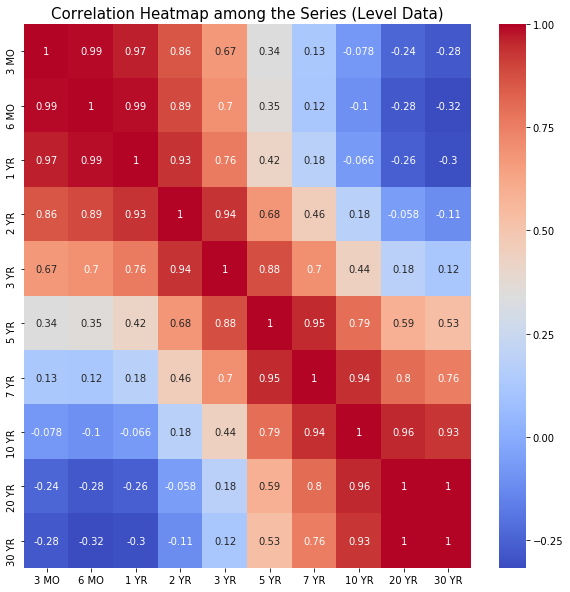

In [11]:
plt.figure(figsize=(10,10))
_ = sns.heatmap(Curve.corr(), annot = True,cmap = 'coolwarm')
_ = plt.title("Correlation Heatmap among the Series (Level Data)", {'fontsize': 15})

In [12]:
Curve.std() # Volatility

3 MO     0.307783
6 MO     0.336595
1 YR     0.362850
2 YR     0.373144
3 YR     0.406488
5 YR     0.474373
7 YR     0.524817
10 YR    0.565370
20 YR    0.674327
30 YR    0.634213
dtype: float64

### 3d: Correlations and volatilities among the series (Daily Differences)

In [13]:
Difference.corr() # Correlation Matrix

,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
3 MO,1.000000,0.456238,0.249671,0.167623,0.157976,0.125513,0.112065,0.107710,0.091462,0.085958
6 MO,0.456238,1.000000,0.452867,0.324543,0.290902,0.251807,0.229080,0.212485,0.183967,0.168531
1 YR,0.249671,0.452867,1.000000,0.571193,0.536979,0.468221,0.424501,0.386355,0.332549,0.315025
2 YR,0.167623,0.324543,0.571193,1.000000,0.882805,0.818106,0.750380,0.686809,0.594294,0.554996
3 YR,0.157976,0.290902,0.536979,0.882805,1.000000,0.931971,0.874256,0.809588,0.705521,0.661388
5 YR,0.125513,0.251807,0.468221,0.818106,0.931971,1.000000,0.968033,0.924379,0.837693,0.794762
7 YR,0.112065,0.229080,0.424501,0.750380,0.874256,0.968033,1.000000,0.972319,0.910304,0.874193
10 YR,0.107710,0.212485,0.386355,0.686809,0.809588,0.924379,0.972319,1.000000,0.960745,0.935516
20 YR,0.091462,0.183967,0.332549,0.594294,0.705521,0.837693,0.910304,0.960745,1.000000,0.982497
30 YR,0.085958,0.168531,0.315025,0.554996,0.661388,0.794762,0.874193,0.935516,0.982497,1.000000


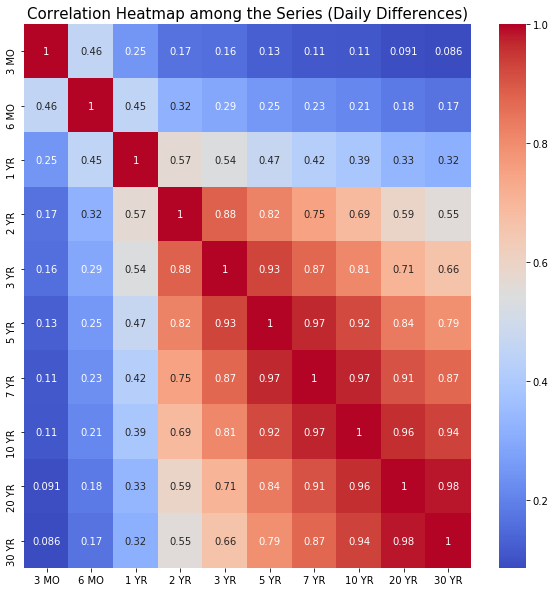

In [14]:
plt.figure(figsize=(10,10))
_ = sns.heatmap(Difference.corr(), annot = True,cmap = 'coolwarm')
_ = plt.title("Correlation Heatmap among the Series (Daily Differences)", {'fontsize': 15})

In [15]:
Difference.std() # Volatility

3 MO     0.014670
6 MO     0.013627
1 YR     0.015363
2 YR     0.028237
3 YR     0.036286
5 YR     0.047329
7 YR     0.051542
10 YR    0.050833
20 YR    0.052029
30 YR    0.051248
dtype: float64

### 3e: Plot the volatility curves

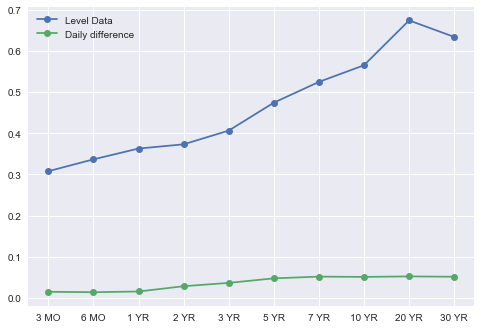

In [16]:
plt.style.use("seaborn")
_ = plt.plot(Curve.std(), marker = 'o')
_ = plt.plot(Difference.std(), marker = 'o')
_ = plt.legend(['Level Data','Daily difference'])